In [ ]:
'''import matplotlib.pyplot as plt
plt.figure(figsize = (12,20))
img = plt.imread('colab.webp')
plt.imshow(img)'''

"import matplotlib.pyplot as plt\nplt.figure(figsize = (12,20))\nimg = plt.imread('colab.webp')\nplt.imshow(img)"

In [ ]:
#Workflow of sci-kit learn
'''
1] setting up data
2] cearting the model
3] training/testing model
4] prediction
'''

'\n1] setting up data\n2] cearting the model\n3] training/testing model\n4] prediction\n'

In [ ]:
#Importing all libraries to be used in it

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# model selection
from sklearn.ensemble import HistGradientBoostingClassifier


In [ ]:
#Importing the accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
# Importing train test split function
from sklearn.model_selection import train_test_split

In [ ]:
# model selection
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Loading the dataset
df = pd.read_csv('Insurance.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,7/16/1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,1/5/2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2/17/2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,11/18/2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df.replace('?',0,inplace = True)

Categories are specied as they should be predictable

In [ ]:
#1st 5 rows
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [ ]:
#finding the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
#Finding no of rows
df.shape

(1000, 39)

In [ ]:
#Finding null values
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [ ]:
#ananlysis of dataset
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


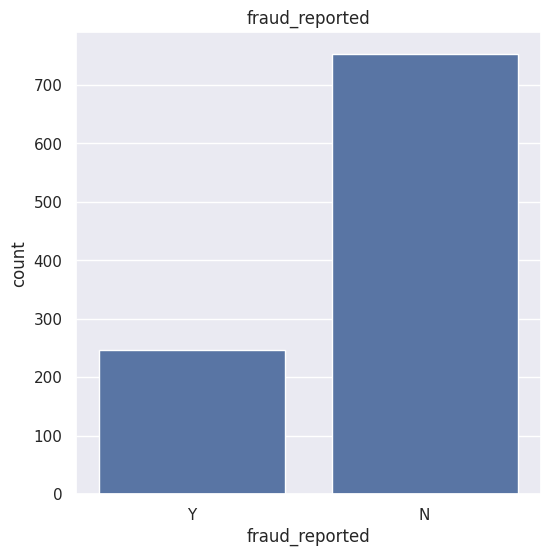

In [ ]:
#Fraud Reported column column
plt.figure(figsize = (6,6))
sns.countplot(x='fraud_reported',data=df)
plt.title("fraud_reported")
plt.show()

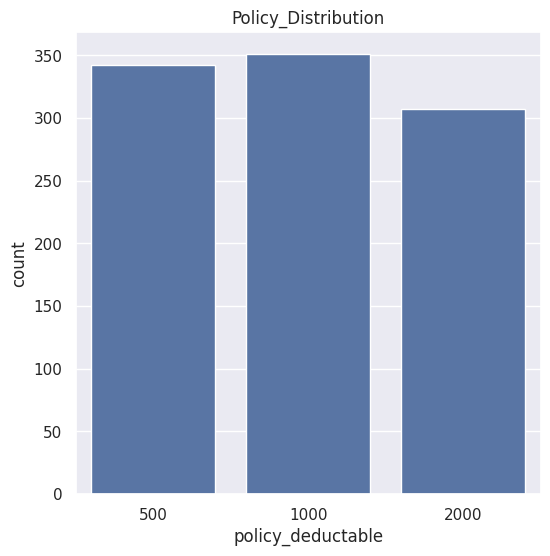

In [ ]:
#Policy Distribution column
plt.figure(figsize = (6,6))
sns.countplot(x='policy_deductable',data=df)
plt.title("Policy_Distribution")
plt.show()

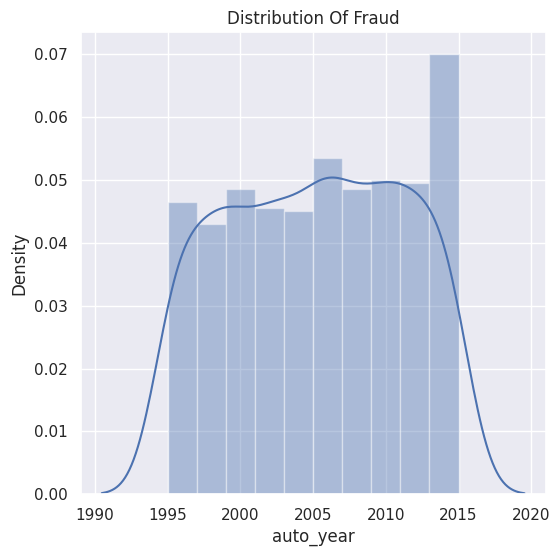

In [ ]:
#Fraud Distribution
sns.set()

plt.figure(figsize = (6,6))

sns.distplot(df['auto_year'])

plt.title("Distribution Of Fraud")

plt.show()

In [ ]:
#Find no. of Fraud
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [ ]:
#Converting the required columns values from String to Integer


#  code to convert insured_sex column as Male as 1 and Female as 0

df['insured_sex'] = df['insured_sex'].map({'Male': 1, 'Female': 0})

#  code to convert the values of insured relationship as own-child = 0, other-relative=1, not-in-family=2,husband=3,wife=4,unmarried=5

df['insured_relationship'] = df['insured_relationship'].map({'own-child': 0, 'other-relative': 1, 'not-in-family': 2,'husband': 3,'wife': 4,'unmarried': 5})

# give code to convert the incident_type column as Parked Car=0, Single Vehicle Collision=1, Multi-vehicle Collision = 2, Vehicle Theft=3

df['incident_type'] = df['incident_type'].map({'Parked Car': 0, 'Single Vehicle Collision': 1, 'Multi-vehicle Collision': 2, 'Vehicle Theft': 3})

# code to covert the collision type column as Rear Collision  0 # Side Collision  1 # Front Collision  2

df['collision_type'] = df['collision_type'].map({'Rear Collision': 0, 'Side Collision': 1, 'Front Collision': 2})

# code to convert incident_severity column as   Minor Damage   0, Total Loss        1, # Major Damage      2, # Trivial Damage     3

df['incident_severity'] = df['incident_severity'].map({'Minor Damage': 0, 'Total Loss': 1, 'Major Damage': 2, 'Trivial Damage': 3})

# code to convert authorities_contacted as  Police   0, # Fire        1,# Other        2,# Ambulance    3

df['authorities_contacted'] = df['authorities_contacted'].map({'Police': 0,'Fire': 1,'Other': 2,'Ambulance': 3})

# code to convert property-_damage column as NO=0 and YES=1

df['property_damage'] = df['property_damage'].map({'NO': 0, 'YES': 1})

# code to convert police_report_available  column as NO=0 and YES=1

df['police_report_available'] = df['police_report_available'].map({'NO': 0, 'YES': 1})

# code to convert fraud_reported  column as N=0 and Y=1

df['fraud_reported'] = df['fraud_reported'].map({'N': 0, 'Y': 1})





In [ ]:
#Seperating input feature as well as the label
to_drop = ['policy_bind_date','policy_state','policy_csl','insured_zip','insured_education_level','insured_occupation','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','authorities_contacted']
X = df.drop(to_drop,axis=1)
Y = df['fraud_reported'] #Label

In [ ]:
print(X)

     months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_sex  insured_relationship  \
0                  1406.91               0          NaN                     3   
1                  1197.22         5000000   

In [ ]:
print(Y)

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
print(X.shape, X_train.shape, Y_test.shape)

(1000, 24) (900, 24) (100,)


In [ ]:
#training the model
model = HistGradientBoostingClassifier()


In [ ]:
#Fit the model
model.fit(X_train, Y_train)

HistGradientBoostingClassifier()

In [ ]:
#Model Evaluation
#Accuracy score for training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print("Accuracy score of training data",training_data_accuracy)

Accuracy score of training data 1.0


In [ ]:
#Model Evaluation
#Accuracy score for training data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print("Accuracy score of testing data",testing_data_accuracy)

Accuracy score of testing data 1.0


In [ ]:
#Building a Predictive System for Fraud Detection
input_data = (328,48,521585,1000,1406.91,0,1,3,53300,0,1,1,2,0,5,1,1,1,2,1,71610,6510,13020,52080)
#Chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#Reshape the np array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
if prediction == 'N':
  print("Fraud Not Detected")
else:
  print("Fraud Detected")

Fraud Detected


In [ ]:
#Building a Predictive System for Fraud Detection
input_data = (256,39,104594,1000,1351.1,0,0,5,0,0,2,0,2,1,19,3,0,0,2,0,64100,6410,6410,51280)
#Chaning the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#Reshape the np array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction = model.predict(input_data_reshaped)
if prediction == 'Y':
  print("Fraud Detected")
else:
  print("Fraud Not Detected")

Fraud Not Detected
